### Ch9_2_2.py
* Create model by functional API

In [2]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Input, Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 定義模型 - 使用 Function API
inputs = Input(shape=(8,))
hidden1 = Dense(10, activation="relu")(inputs)
hidden2 = Dense(8, activation="relu")(hidden1)
outputs = Dense(1, activation="sigmoid")(hidden2)
model = Model(inputs=inputs, outputs=outputs)
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
# 訓練模型
model.fit(X, Y, epochs=15, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________
768/768 [==============================] - 0s 38us/step
準確度 = 0.65


### Ch9_2_3.py
* MLP autoencoder by functional API

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output

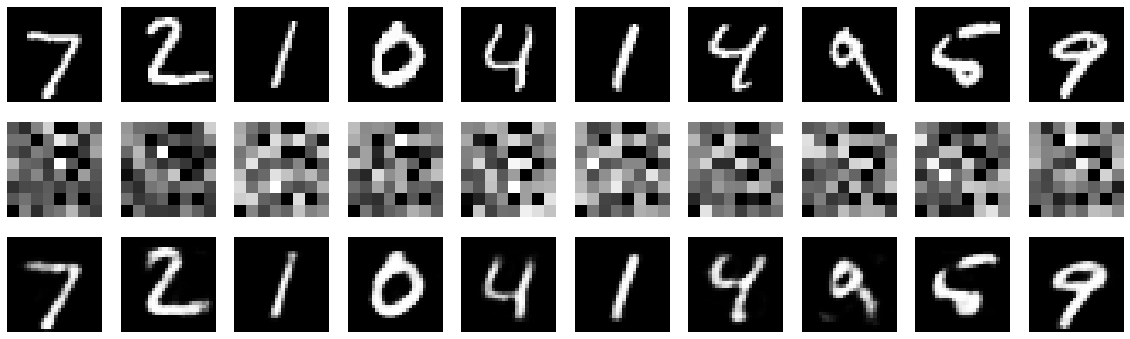

In [5]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
%matplotlib inline

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, _), (X_test, _) = mnist.load_data()
# 轉換成 28*28 = 784 的向量
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# 定義 autoencoder 模型
input_img = Input(shape=(784,))
x = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(encoded)
decoded = Dense(784, activation="sigmoid")(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()  # 顯示模型摘要資訊
# 定義 encoder 模型
encoder = Model(input_img, encoded)
encoder.summary()    # 顯示模型摘要資訊
# 定義 decoder 模型
decoder_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-2](decoder_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()    # 顯示模型摘要資訊
# 編譯模型
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])
# 訓練模型
autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), 
                epochs=10, batch_size=256, shuffle=True, verbose=0)
# 壓縮圖片
encoded_imgs = encoder.predict(X_test)
# 解壓縮圖片
decoded_imgs = decoder.predict(encoded_imgs)
# 顯示原始, 壓縮和還原圖片
import matplotlib.pyplot as plt

n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 6))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(8, 8), cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

### Ch9_2_4.py
* CNN autoencoder

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0  

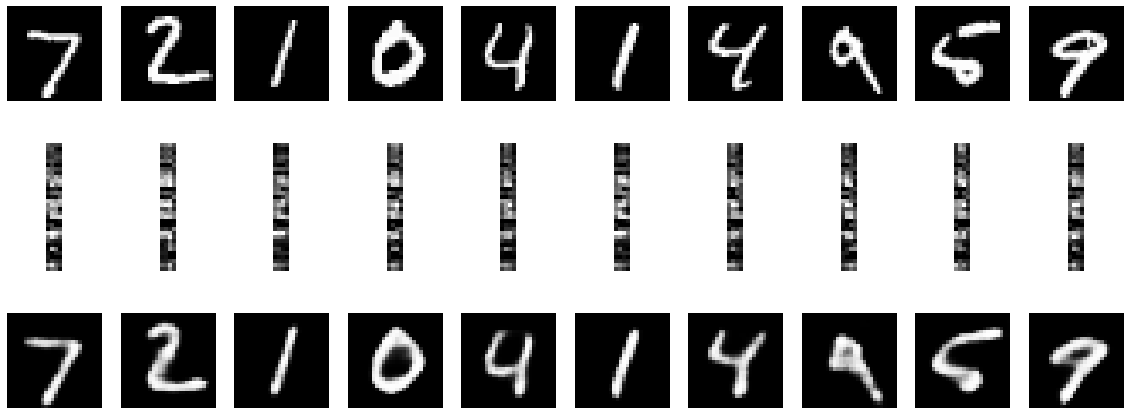

In [7]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, _), (X_test, _) = mnist.load_data()
# 轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# 定義 autoencoder 模型
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation="relu")(x) # recover to original size by padding != "same" 
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()    # 顯示模型摘要資訊
# 定義 encoder 模型
encoder = Model(input_img, encoded)
encoder.summary()   # 顯示模型摘要資訊
# 定義 decoder 模型
decoder_input = Input(shape=(4,4,8))
decoder_layer = autoencoder.layers[-7](decoder_input)
decoder_layer = autoencoder.layers[-6](decoder_layer)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()   # 顯示模型摘要資訊
# 編譯模型
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])
# 訓練模型
autoencoder.fit(X_train, X_train, validation_data=(X_test, X_test), 
                epochs=10, batch_size=128, shuffle=True, verbose=0)
# 壓縮圖片
encoded_imgs = encoder.predict(X_test)
# 解壓縮圖片
decoded_imgs = decoder.predict(encoded_imgs)
# 顯示原始, 壓縮和還原圖片
import matplotlib.pyplot as plt

n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 8))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(4, 4*8).T, cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

* MaxPooling2D: 28/2 -> 14/2 -> 7/2 -> 4
* UpSampling2D: 4 * 2 -> 8 * 2 -> 16 * 2 -> 32 ...not the same as 28, so:

x = Conv2D(16, (3,3), activation="relu")(x)  ...recover to original size by padding != "same" 


### Ch9_2_5.py
* CNN autoencoder to remove noises

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0  

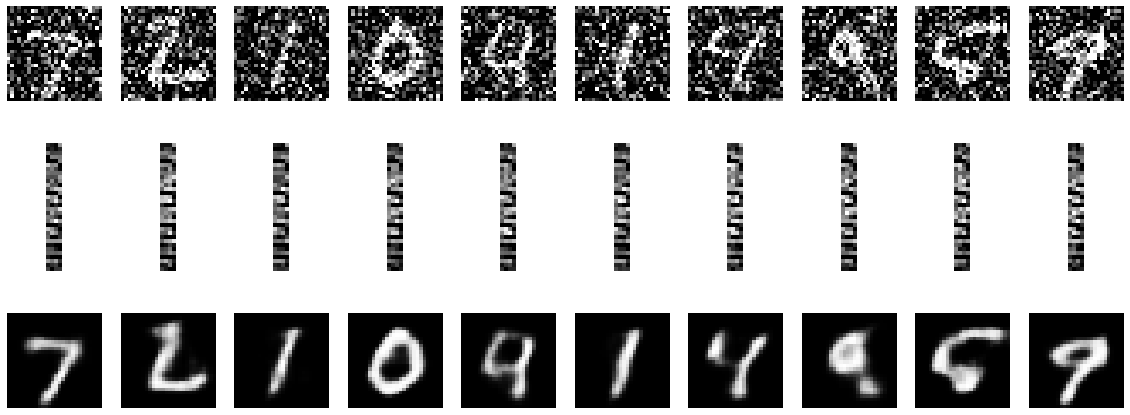

In [8]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, _), (X_test, _) = mnist.load_data()
# 轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# 替圖片製造雜訊
nf = 0.5
size_train = X_train.shape
X_train_noisy = X_train+nf*np.random.normal(loc=0.0,
                          scale=1.0,size=size_train)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
size_test = X_test.shape
X_test_noisy = X_test+nf*np.random.normal(loc=0.0,
                          scale=1.0,size=size_test)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
# 定義 autoencoder 模型
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation="relu")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()   # 顯示模型摘要資訊
# 定義 encoder 模型
encoder = Model(input_img, encoded)
encoder.summary()    # 顯示模型摘要資訊
# 定義 decoder 模型
decoder_input = Input(shape=(4,4,8))
decoder_layer = autoencoder.layers[-7](decoder_input)
decoder_layer = autoencoder.layers[-6](decoder_layer)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()   # 顯示模型摘要資訊
# 編譯模型
autoencoder.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])
# 訓練模型
autoencoder.fit(X_train_noisy, X_train, 
                validation_data=(X_test_noisy, X_test), 
                epochs=10, batch_size=128, shuffle=True, verbose=0)
# 壓縮圖片
encoded_imgs = encoder.predict(X_test_noisy)
# 解壓縮圖片
decoded_imgs = decoder.predict(encoded_imgs)
# 顯示雜訊圖片, 壓縮圖片和還原圖片
import matplotlib.pyplot as plt

n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 8))
for i in range(n):
    # 雜訊圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(4, 4*8).T, cmap="gray")
    ax.axis("off")
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()